## EDA on IRIS-dataset and ML models

In [3]:
# 패키지 로딩
import numpy as  np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
import os
from sklearn.datasets import load_iris 

In [76]:
# iris 데이터셋을 iris 라는 변수에 저장
iris=load_iris()
iris_data=iris.data
iris_label=iris.target 

# 데이터 프레임 변환 
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris_label 

# 데이터 프레임 확인
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [77]:
# Rename the columns
# method 1)   
iris_df.columns.str.replace(' ','_').str.replace('_\(cm\)','')


# method 2) 
iris_df.columns

iris_df.rename({'sepal length (cm)':'sepal_length', 
                'sepal width (cm)':'sepal_width', 
                'petal length (cm)':'petal_length',
       'petal width (cm)':'petal_width'},inplace=True, axis=1)

iris_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,label
82,5.8,2.7,3.9,1.2,1
107,7.3,2.9,6.3,1.8,2
56,6.3,3.3,4.7,1.6,1
100,6.3,3.3,6.0,2.5,2
99,5.7,2.8,4.1,1.3,1


In [58]:
# Calculate median of each species
x=iris_df.groupby('label').median()
x 

,sepal_length,sepal_width,petal_length,petal_width
label,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


In [60]:
# Statistics of this dataset
stats=iris_df.describe()
stats 

,sepal_length,sepal_width,petal_length,petal_width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [61]:
# Calculate range, and move columns 25%, 50%, 75%, and mean values into a df 
stats.loc['range']=stats.loc['max'] - stats.loc['min']
new_df=stats.loc[['mean','range','25%','50%','75%']]
new_df.rename({'50%':'median'},inplace=True)
new_df

,sepal_length,sepal_width,petal_length,petal_width,label
mean,5.843333,3.057333,3.758,1.199333,1.0
range,3.600000,2.400000,5.900,2.400000,2.0
25%,5.100000,2.800000,1.600,0.300000,0.0
median,5.800000,3.000000,4.350,1.300000,1.0
75%,6.400000,3.300000,5.100,1.800000,2.0


In [69]:
# aggregation functions 
# Calculate mean and median or other using multiple functions at once -2 methods
# Passing a list of recognized strings 
iris_df.groupby('label').agg(['mean','median'])
iris_df.groupby('label').agg([np.mean, np.median]) 

sepal_length        sepal_width        petal_length        petal_width  \
              mean median        mean median         mean median        mean   
label                                                                          
0            5.006    5.0       3.428    3.4        1.462   1.50       0.246   
1            5.936    5.9       2.770    2.8        4.260   4.35       1.326   
2            6.588    6.5       2.974    3.0        5.552   5.55       2.026   

              
      median  
label         
0        0.2  
1        1.3  
2        2.0

In [73]:
# Explicit aggr function like max for a column 
agg_dict={field:['mean','median'] for field in iris_df.columns.tolist() if field !='label'}
agg_dict['petal_length']='max'
iris_df.groupby('label').agg(agg_dict)



sepal_length        sepal_width        petal_length petal_width       
              mean median        mean median          max        mean median
label                                                                       
0            5.006    5.0       3.428    3.4          1.9       0.246    0.2
1            5.936    5.9       2.770    2.8          5.1       1.326    1.3
2            6.588    6.5       2.974    3.0          6.9       2.026    2.0

In [74]:
# visualisations 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

Text(0.5, 1.0, 'Distirbutions of petal-width')

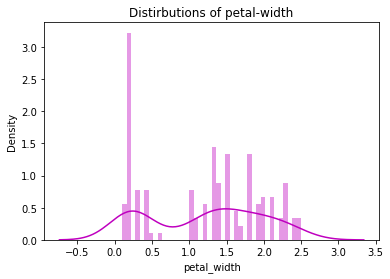

In [80]:
# Distribution Plot
sns.distplot(a=iris_df['petal_width'], bins=40, color='m')
plt.title('Distirbutions of petal-width')

## Count plot
displays the number of observations for a categorical variable using bars

<AxesSubplot:xlabel='label', ylabel='count'>

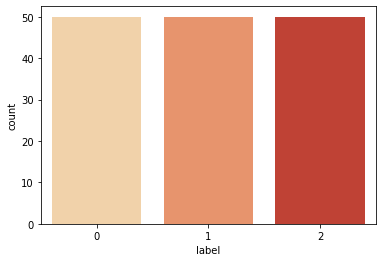

In [81]:
# Count plot 
sns.countplot(x='label',data=iris_df, palette='OrRd')

## Box Plot
Shows the distribution of quantitative data across a categorical variable

<AxesSubplot:xlabel='label', ylabel='sepal_width'>

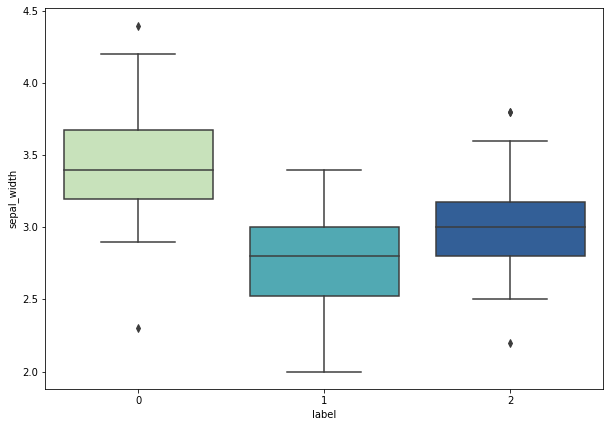

In [82]:
# Box Plot 
plt.figure(figsize=(10,7))
sns.boxplot(x='label',y='sepal_width',data=iris_df, palette='YlGnBu')

## violin plot
This is a variation of box plot. It shows the distribution of quantitative data across several levels of categorical variables. The violin plot also features a kde of the underlying distribution

<AxesSubplot:xlabel='label', ylabel='petal_length'>

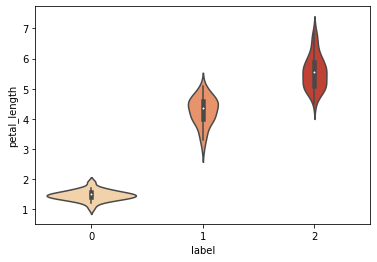

In [83]:
# Violin Plot
sns.violinplot(x='label',y='petal_length',data=iris_df,palette='OrRd')

## Matrix plots
1. HeatMap : It provides the graph of the correlation matrix 
2. Cluster Map : It is plot of Matrix dataset as a hierarchically clustered heatmap

<AxesSubplot:>

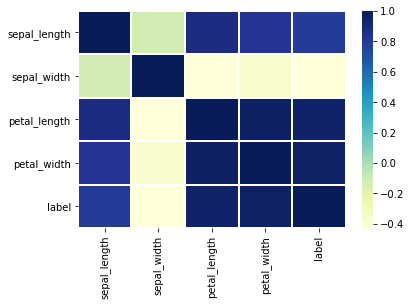

In [88]:
sns.heatmap(iris_df.corr(),cmap='YlGnBu', linecolor='white',linewidths=1)

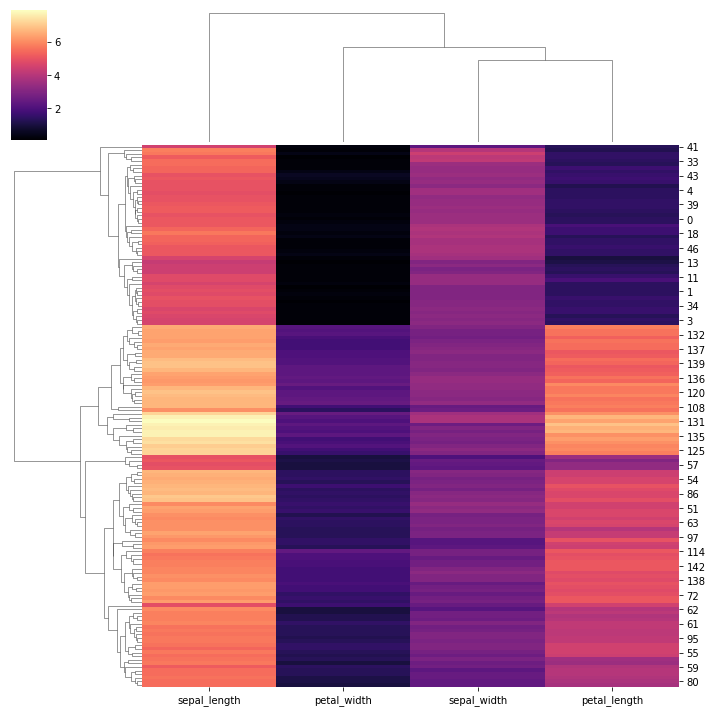

In [91]:
# Cluster map takes only quantitative variables, so we need to do some processing here
x=iris_df.drop('label', axis=1)
g=sns.clustermap(x,cmap='magma')

## Regression Plots

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

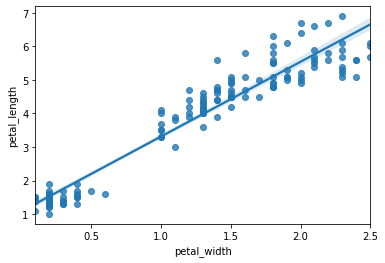

In [93]:
sns.regplot(x='petal_width', y='petal_length',data=iris_df)